Project Task 1 - Basic Classifiers and Evaluation

1) Prepare the dataset in order to build several basic classifiers able to predict room occupancy from the available variables. You are welcome in creating new variables.

2) Solve the classification task with k-NN (testing values of k), Naive Bayes, Logistic Regression, Decision Tree using cross-validation and/or random/grid search for parameter estimation.

3) Evaluate each classifier using Accuracy, Precision, Recall, F1, ROC, AUC and Lift Chart.

4) Try to reduce the dimensionality of the dataset using the methods studied (or new ones). Test PCA and try to solve the classification task in two dimensions. Plot the dataset in the two new dimensions and observe the decision boundary and the one of the trained algorithms.

5) Analyze the value distribution of the class to predict and turn the dataset into an imbalanced version reaching a strong majority-minority distribution (e.g. 96%-4%). Then solve again the classification task adopting the various techniques studied (or new ones).

6) Select two continuous attributes, define a regression problem and try to solve it using different techniques reporting various evaluation measures. Plot the two-dimensional dataset. Then generalize to multiple linear regression and observe how the performance varies.

7) Draw your conclusions about the basic classifiers and techniques adopted in this analysis.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter

In [2]:
df = pd.read_csv("datatraining.txt")

In [3]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [4]:
df.shape

(8143, 7)

In [5]:
df.Occupancy.value_counts()

0    6414
1    1729
Name: Occupancy, dtype: int64

Text(0, 0.5, 'Occupancy frequency')

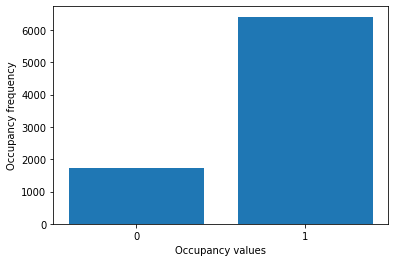

In [6]:
plt.bar(x=df.Occupancy.unique(), height=df.Occupancy.value_counts())
plt.xticks(df.Occupancy.unique())
plt.xlabel('Occupancy values')
plt.ylabel('Occupancy frequency')

In [7]:
dates = pd.to_datetime(df['date'], infer_datetime_format=True)
df['day'] = dates.dt.day
df['hour'] = dates.dt.hour

In [8]:
weekend = []
for i in df.day:
    if i == 7 or i == 8:
        weekend.append(1)
    else:
        weekend.append(0)
weekend = pd.Series(weekend)
df['weekend'] = weekend

In [9]:
daylight = []
for i in df.hour:
    if i >= 7 and i <= 17:
        daylight.append(1)
    else:
        daylight.append(0)
daylight = pd.Series(daylight)
df['daylight'] = daylight

In [10]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour,weekend,daylight
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,4,17,0.0,1.0
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,4,17,0.0,1.0
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,4,17,0.0,1.0
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,4,17,0.0,1.0
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,4,17,0.0,1.0


In [11]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour,weekend,daylight
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8142.000000,8142.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330,7.075525,11.390642,0.353721,0.425203
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982,1.674896,7.092195,0.478153,0.494404
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000,4.000000,0.000000,0.000000,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000,6.000000,5.000000,0.000000,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000,7.000000,11.000000,0.000000,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000,8.000000,18.000000,1.000000,1.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000,10.000000,23.000000,1.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 11 columns):
date             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
day              8143 non-null int64
hour             8143 non-null int64
weekend          8142 non-null float64
daylight         8142 non-null float64
dtypes: float64(7), int64(3), object(1)
memory usage: 763.4+ KB


In [13]:
df.drop(['HumidityRatio'],inplace=True,axis=1)

In [14]:
df.dropna(axis = 0, inplace = True)

In [15]:
df.reset_index(drop = True)

,date,Temperature,Humidity,Light,CO2,Occupancy,day,hour,weekend,daylight
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,1,4,17,0.0,1.0
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,1,4,17,0.0,1.0
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,1,4,17,0.0,1.0
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,1,4,17,0.0,1.0
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,1,4,17,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
8137,2015-02-10 09:28:00,21.05,36.0500,433.0,780.250000,1,10,9,0.0,1.0
8138,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,1,10,9,0.0,1.0
8139,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,1,10,9,0.0,1.0
8140,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,1,10,9,0.0,1.0


In [16]:
df = df[['Temperature', 'Humidity', 'Light', 'CO2', 'Occupancy', 'day', 'hour', 'weekend', 'daylight']]

In [17]:
df.head()

,Temperature,Humidity,Light,CO2,Occupancy,day,hour,weekend,daylight
1,23.18,27.2720,426.0,721.25,1,4,17,0.0,1.0
2,23.15,27.2675,429.5,714.00,1,4,17,0.0,1.0
3,23.15,27.2450,426.0,713.50,1,4,17,0.0,1.0
4,23.15,27.2000,426.0,708.25,1,4,17,0.0,1.0
5,23.10,27.2000,426.0,704.50,1,4,17,0.0,1.0


In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
X = scaler.fit_transform(df.values)

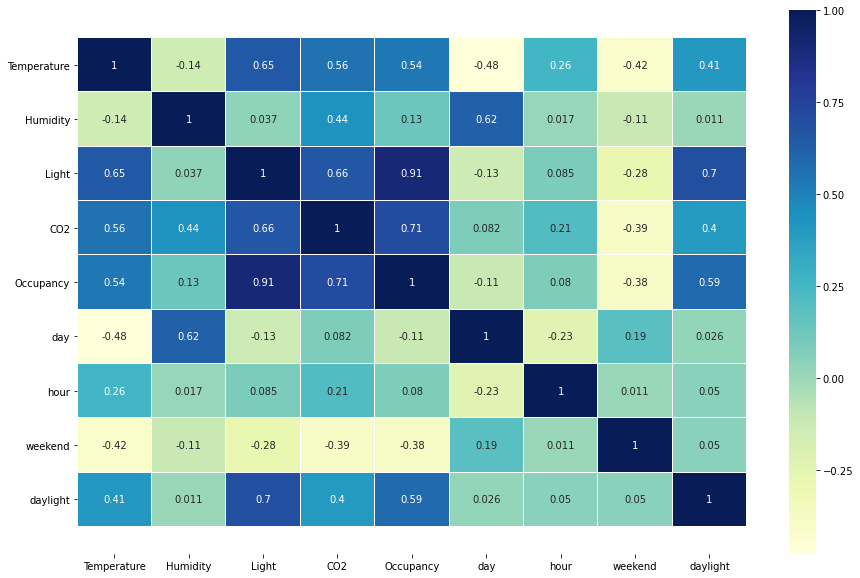

In [21]:
#Correlation Pearson (linear correlation)
plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(), annot = True, linewidth=0.1, cmap='YlGnBu')
#To fix matplot error
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
##
plt.show()

# Data Partitioning

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
class_name = 'Occupancy'

In [24]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y) # IMPORTANT test_size change shape

In [25]:
X_train.shape

(5699, 8)

# Classification

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9909946786737618
F1-score [0.99430936 0.97843137]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1925
           1       0.99      0.96      0.98       518

    accuracy                           0.99      2443
   macro avg       0.99      0.98      0.99      2443
weighted avg       0.99      0.99      0.99      2443



# Variance Threshold

In [28]:
from sklearn.feature_selection import VarianceThreshold

In [29]:
sel = VarianceThreshold(threshold=(.8 * (1 - .4)))
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(5699, 6)

In [30]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9914040114613181
F1-score [0.99456662 0.97943193]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1925
           1       0.99      0.97      0.98       518

    accuracy                           0.99      2443
   macro avg       0.99      0.98      0.99      2443
weighted avg       0.99      0.99      0.99      2443



# Univariate Feature Selection

In [31]:
from sklearn.feature_selection import SelectKBest

In [32]:
sel = SelectKBest(k=3)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

(5699, 3)

In [33]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9848546868604175
F1-score [0.99040705 0.96404276]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1925
           1       0.97      0.96      0.96       518

    accuracy                           0.98      2443
   macro avg       0.98      0.97      0.98      2443
weighted avg       0.98      0.98      0.98      2443



# Recursive Feature Elimination

In [34]:
from sklearn.feature_selection import SelectFromModel

In [35]:
sel = SelectFromModel(DecisionTreeClassifier())
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(5699, 1)

In [36]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.984036021285305
F1-score [0.98985696 0.96253602]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1925
           1       0.96      0.97      0.96       518

    accuracy                           0.98      2443
   macro avg       0.97      0.98      0.98      2443
weighted avg       0.98      0.98      0.98      2443



# Principal Component Analysis

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [39]:
X_train_pca.shape

(5699, 2)

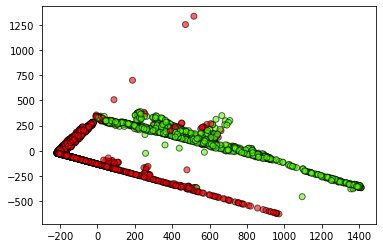

In [40]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.6)
plt.show()

In [41]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9819893573475236
F1-score [0.98858921 0.95728155]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1925
           1       0.96      0.95      0.96       518

    accuracy                           0.98      2443
   macro avg       0.97      0.97      0.97      2443
weighted avg       0.98      0.98      0.98      2443



# Come cazzo cambio?

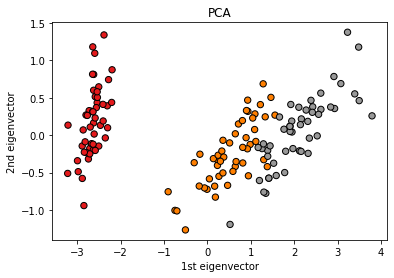

In [42]:
from sklearn import datasets

iris = datasets.load_iris()
X_pca = PCA(n_components=2).fit_transform(iris.data)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.title("PCA")
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.show()

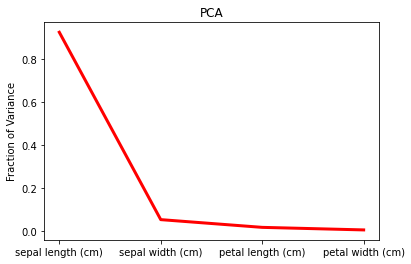

In [43]:
plt.plot(PCA(n_components=4).fit(iris.data).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.xticks(range(4), iris.feature_names)
plt.show()

# ROC curve

In [44]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [45]:
y_score = clf.predict_proba(X_test_pca)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

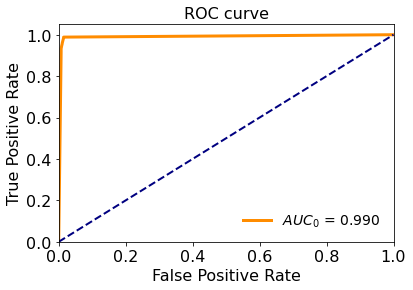

In [46]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Adjust the Decision Threshold

Accuracy 0.9893573475235367
F1-score [0.99328859 0.9743083 ]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1925
           1       1.00      0.95      0.97       518

    accuracy                           0.99      2443
   macro avg       0.99      0.98      0.98      2443
weighted avg       0.99      0.99      0.99      2443



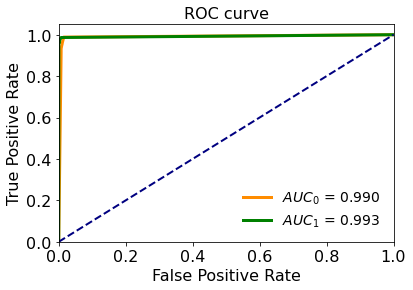

In [47]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

def adjusted_predict(X, thr=0.5):
    y_score = clf.predict_proba(X_test)[:, 1]
    return np.array([1 if y > thr else 0 for y in y_score])

y_pred = adjusted_predict(X_test, thr=0.8)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Undersampling

In [48]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour

# RandomUnderSampler

In [49]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 1210, 1: 1210})


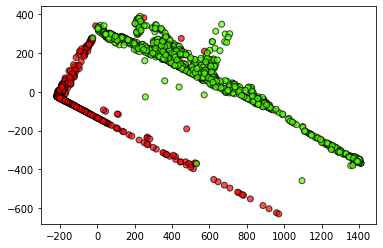

In [50]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.9926320098239869
F1-score [0.99531738 0.98272553]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1925
           1       0.98      0.99      0.98       518

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



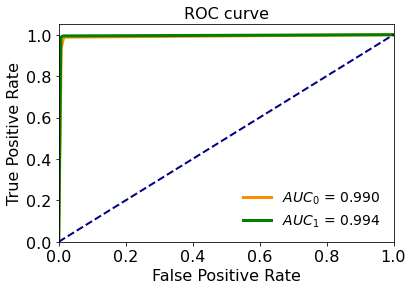

In [51]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# CondensedNearestNeighbour

In [52]:
import warnings
warnings.simplefilter("ignore")

In [53]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 1210, 0: 58})


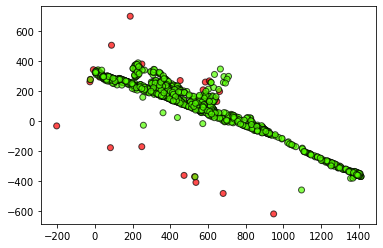

In [54]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.9864920180106427
F1-score [0.99142634 0.96817743]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1925
           1       0.97      0.97      0.97       518

    accuracy                           0.99      2443
   macro avg       0.98      0.98      0.98      2443
weighted avg       0.99      0.99      0.99      2443



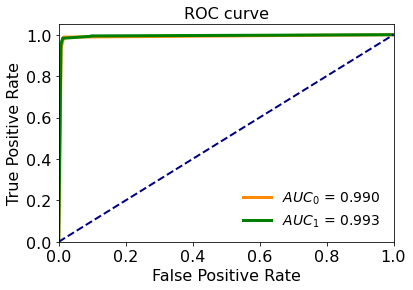

In [55]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Class Weight

Accuracy 0.9930413426115432
F1-score [0.99557867 0.98366955]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1925
           1       0.98      0.99      0.98       518

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



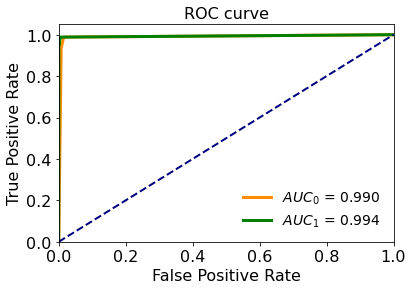

In [56]:
clf = DecisionTreeClassifier(min_samples_leaf=3, class_weight={0:1, 1: 5}, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Scikit-plot

In [57]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

In [58]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9909946786737618
F1-score [0.99430936 0.97843137]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1925
           1       0.99      0.96      0.98       518

    accuracy                           0.99      2443
   macro avg       0.99      0.98      0.99      2443
weighted avg       0.99      0.99      0.99      2443



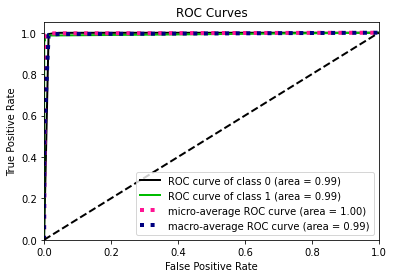

In [59]:
plot_roc(y_test, y_score)
plt.show()

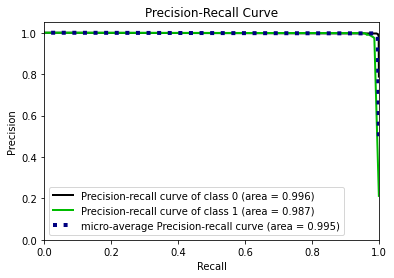

In [60]:
plot_precision_recall(y_test, y_score)
plt.show()

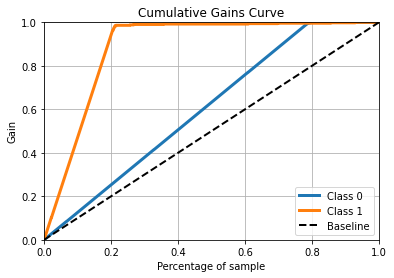

In [61]:
plot_cumulative_gain(y_test, y_score)
plt.show()

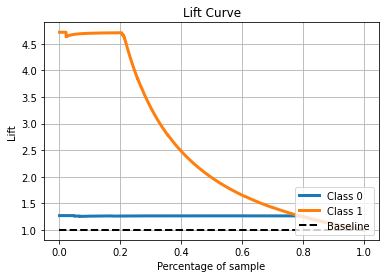

In [62]:
plot_lift_curve(y_test, y_score)
plt.show()